
Fidelity Results:
Fidelity for Original Path: 1.00000000000000000000000000000000
Fidelity for Reversed Path: 1.00000000000000000000000000000000
Fidelity for Clockwise Path: 1.00000000000000000000000000000000
Fidelity for Counterclockwise Path: 1.00000000000000000000000000000000



Results for Original Path:
Berry Phase: 0.00000000000000000000000000000000 rad
Berry Phase (degrees): 0.00000000000000000000000000000000°
Angle Difference between Initial and Final Spinor: 0.00000000000000000000000000000000 rad
Average Normalization: 1.00000000000000000000000000000000
Average Uncertainty: 0.40872539990897011064063804042235
Normalization Check: PASSED (Max Deviation: 0.0000000000000003)
Uncertainty Principle Check: FAILED (Average Uncertainty: 0.40872539990897011064063804042235)

Results for Reversed Path:
Berry Phase: 0.00000000000000000000000000000000 rad
Berry Phase (degrees): 0.00000000000000000000000000000000°
Angle Difference between Initial and Final Spinor: 0.00000000000000000000000000000000 rad
Average Normalization: 1.00000000000000000000000000000000
Average Uncertainty: 0.40872539990897011064063804042235
Normalization Check: PASSED (Max Deviation: 0.0000000000000003)
Uncertainty Principle Check: FAILED (Average Uncertainty: 0.40872539990897011064063804042235

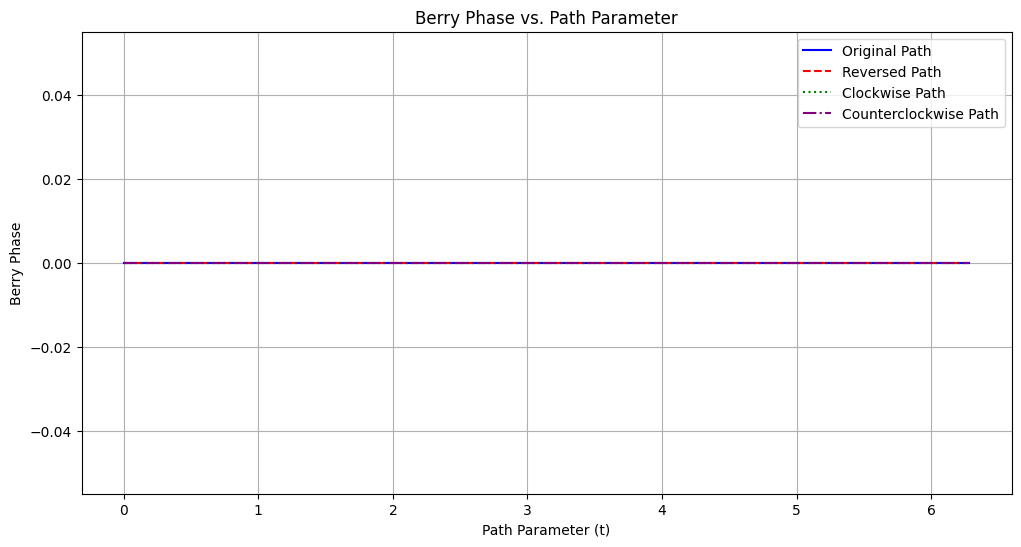

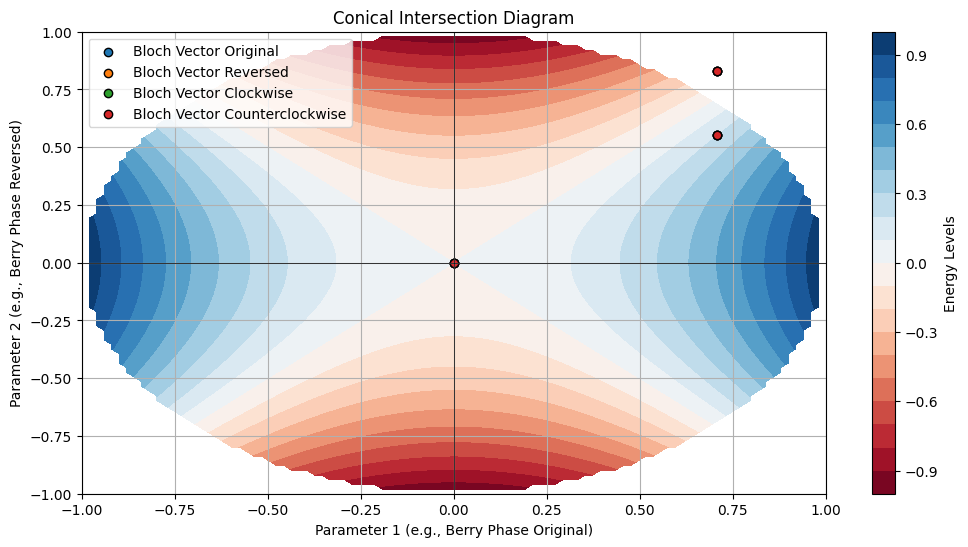

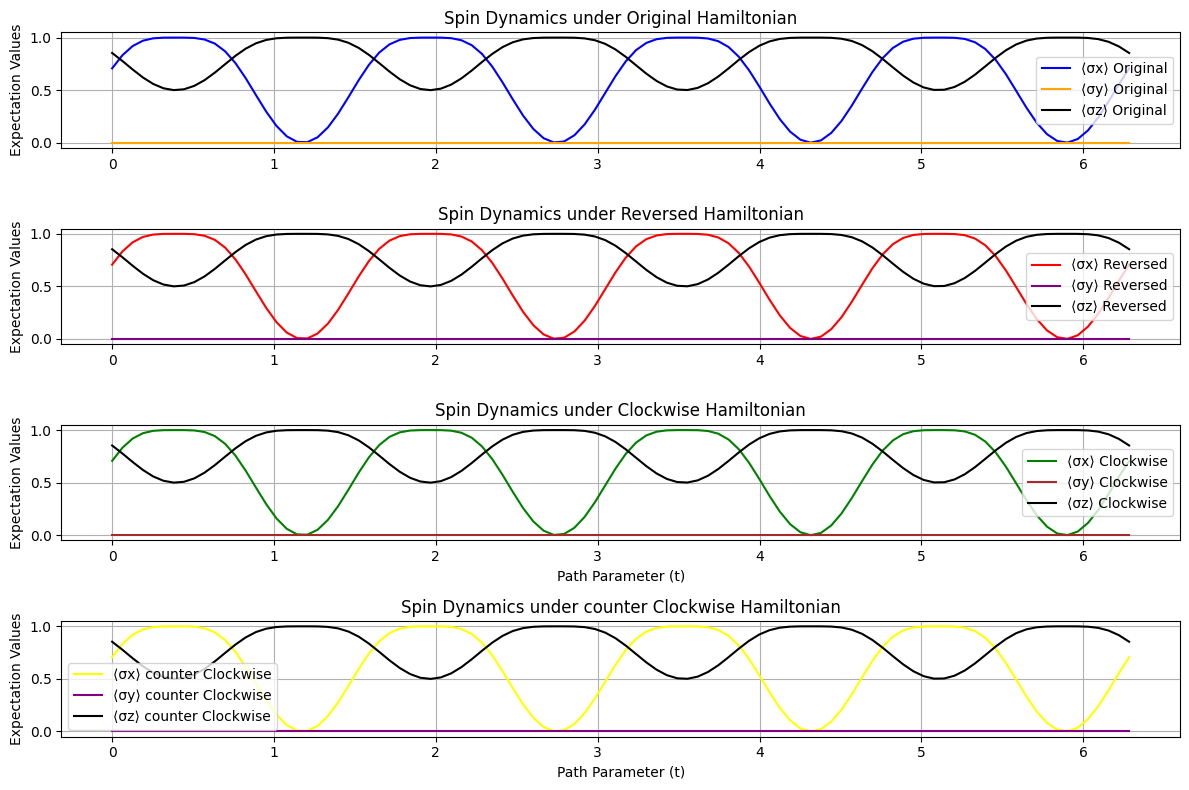

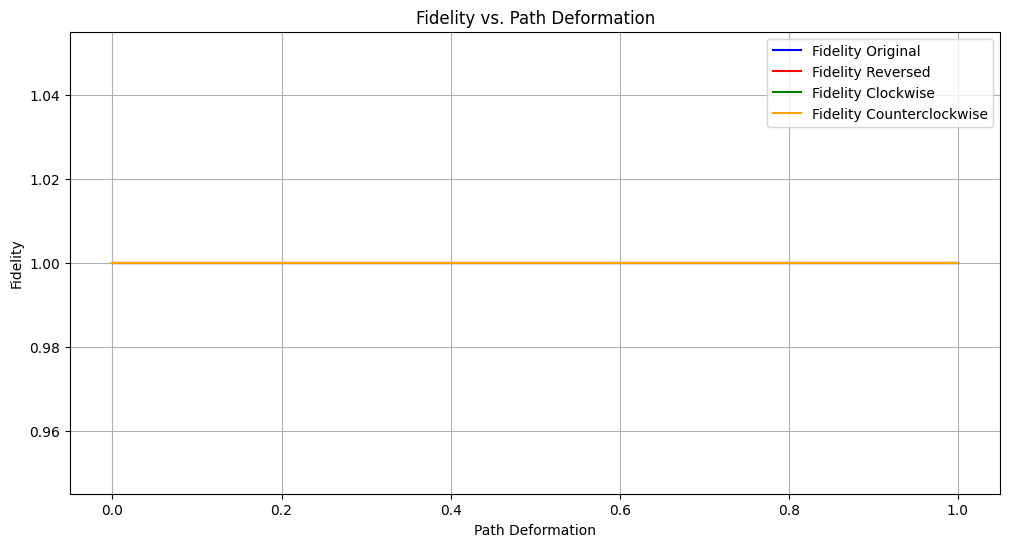

In [5]:
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from scipy.linalg import expm

# Functions as previously defined
def spinor(theta, phi):
    return np.array([np.cos(theta/2), np.exp(1j*phi)*np.sin(theta/2)])

def rotate_spinor(spinor, angle):
    rotation_matrix = np.array([[np.cos(angle/2), -np.sin(angle/2)],
                                [np.sin(angle/2), np.cos(angle/2)]])
    return np.dot(rotation_matrix, spinor)

def bloch_vector(spinor):
    x = 2 * np.real(np.conj(spinor[0]) * spinor[1])
    y = 2 * np.imag(np.conj(spinor[0]) * spinor[1])
    z = np.abs(spinor[0])**2 - np.abs(spinor[1])**2
    return np.array([x, y, z])

def berry_phase(spinors):
    phase = 0
    for i in range(len(spinors) - 1):
        phase += np.imag(np.log(np.vdot(spinors[i], spinors[i+1])))
    phase += np.imag(np.log(np.vdot(spinors[-1], spinors[0])))
    return phase

# Create the figure-8 path and elevate the z-axis for visual clarity
t = np.linspace(0, 2*np.pi, 100)

# Original Path: First loop counterclockwise, second loop clockwise
x_orig = np.sin(t)
y_orig = np.sin(2*t)
z_orig =  np.zeros_like(t)  # Adding elevation to the z-axis for better visualization

# Reversed Path: First loop clockwise, second loop counterclockwise
x_rev = np.sin(-t)
y_rev = np.sin(-2*t)
z_rev =  np.zeros_like(-t)  # Adding elevation to the z-axis for better visualization

# Both Loops Clockwise
x_clk = np.sin(-t)
y_clk = np.sin(2*t)
z_clk =  np.zeros_like(t)  # Adding elevation to the z-axis for better visualization

# Both Loops Counterclockwise
x_cntclk = np.sin(t)
y_cntclk = np.sin(-2*t)
z_cntclk = np.zeros_like(-t)  # Adding elevation to the z-axis for better visualization

def simulate_path(x, y, z, dt, rotation_angle):
    initial_spinor = spinor(np.pi/4, 0)  # 45-degree spinor
    rotated_spinors = [initial_spinor]
    bloch_vectors = [bloch_vector(initial_spinor)]
    for i in range(1, len(t)):
        # Calculate a rotation angle that brings the spinor back to the original state
        angle = rotation_angle * np.sin(4*t[i]) #if i < len(t) // 2 else -rotation_angle * np.sin(4*t[i])
        rotated_spinor = rotate_spinor(initial_spinor, angle)
        rotated_spinors.append(rotated_spinor)
        bloch_vectors.append(bloch_vector(rotated_spinor))
    return np.array(rotated_spinors), np.array(bloch_vectors)

dt = t[1] - t[0]

# Simulate each path with continuous rotation and specific rotation angles
rotated_spinors_orig, bloch_vectors_orig = simulate_path(x_orig, y_orig, z_orig, dt, np.pi/4)
rotated_spinors_rev, bloch_vectors_rev = simulate_path(x_rev, y_rev, z_rev, dt, np.pi/4)#3*pi/4 make 0 diff
rotated_spinors_clk, bloch_vectors_clk = simulate_path(x_clk, y_clk, z_clk, dt, np.pi/4)
rotated_spinors_cntclk, bloch_vectors_cntclk = simulate_path(x_cntclk, y_cntclk, z_cntclk, dt, np.pi/4)

# Calculate Berry phase and angle difference for each path
berry_phase_orig = berry_phase(rotated_spinors_orig)
angle_diff_orig = np.arccos(np.abs(np.vdot(rotated_spinors_orig[0], rotated_spinors_orig[-1])))

berry_phase_rev = berry_phase(rotated_spinors_rev)
angle_diff_rev = np.arccos(np.abs(np.vdot(rotated_spinors_rev[0], rotated_spinors_rev[-1])))

berry_phase_clk = berry_phase(rotated_spinors_clk)
angle_diff_clk = np.arccos(np.abs(np.vdot(rotated_spinors_clk[0], rotated_spinors_clk[-1])))

berry_phase_cntclk = berry_phase(rotated_spinors_cntclk)
angle_diff_cntclk = np.arccos(np.abs(np.vdot(rotated_spinors_cntclk[0], rotated_spinors_cntclk[-1])))

# Calculate expectation values of Pauli matrices for each path
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, 0]])

exp_x_orig = [np.real(np.conj(s).dot(sigma_x.dot(s))) for s in rotated_spinors_orig]
exp_y_orig = [np.real(np.conj(s).dot(sigma_y.dot(s))) for s in rotated_spinors_orig]
exp_z_orig = [np.real(np.conj(s).dot(sigma_z.dot(s))) for s in rotated_spinors_orig]

exp_x_rev = [np.real(np.conj(s).dot(sigma_x.dot(s))) for s in rotated_spinors_rev]
exp_y_rev = [np.real(np.conj(s).dot(sigma_y.dot(s))) for s in rotated_spinors_rev]
exp_z_rev = [np.real(np.conj(s).dot(sigma_z.dot(s))) for s in rotated_spinors_rev]

exp_x_clk = [np.real(np.conj(s).dot(sigma_x.dot(s))) for s in rotated_spinors_clk]
exp_y_clk = [np.real(np.conj(s).dot(sigma_y.dot(s))) for s in rotated_spinors_clk]
exp_z_clk = [np.real(np.conj(s).dot(sigma_z.dot(s))) for s in rotated_spinors_clk]

exp_x_cntclk = [np.real(np.conj(s).dot(sigma_x.dot(s))) for s in rotated_spinors_cntclk]
exp_y_cntclk = [np.real(np.conj(s).dot(sigma_y.dot(s))) for s in rotated_spinors_cntclk]
exp_z_cntclk = [np.real(np.conj(s).dot(sigma_z.dot(s))) for s in rotated_spinors_cntclk]

# Validate quantum physics laws for each path
normalization_orig = [np.abs(np.vdot(s, s)) for s in rotated_spinors_orig]
uncertainty_principle_orig = [np.std([ex, ey, ez]) for ex, ey, ez in zip(exp_x_orig, exp_y_orig, exp_z_orig)]

normalization_rev = [np.abs(np.vdot(s, s)) for s in rotated_spinors_rev]
uncertainty_principle_rev = [np.std([ex, ey, ez]) for ex, ey, ez in zip(exp_x_rev, exp_y_rev, exp_z_rev)]

normalization_clk = [np.abs(np.vdot(s, s)) for s in rotated_spinors_clk]
uncertainty_principle_clk = [np.std([ex, ey, ez]) for ex, ey, ez in zip(exp_x_clk, exp_y_clk, exp_z_clk)]

normalization_cntclk = [np.abs(np.vdot(s, s)) for s in rotated_spinors_cntclk]
uncertainty_principle_cntclk = [np.std([ex, ey, ez]) for ex, ey, ez in zip(exp_x_cntclk, exp_y_cntclk, exp_z_cntclk)]

# Visualize the results using Plotly
fig_orig = make_subplots(rows=2, cols=3, specs=[
    [{'type': 'scatter3d'}, {'type': 'scatter3d'}, {'type': 'scatter'}],
    [{'type': 'scatter'}, {'type': 'scatter'}, {'type': 'scatter'}]
])

fig_rev = make_subplots(rows=2, cols=3, specs=[
    [{'type': 'scatter3d'}, {'type': 'scatter3d'}, {'type': 'scatter'}],
    [{'type': 'scatter'}, {'type': 'scatter'}, {'type': 'scatter'}]
])

fig_clk = make_subplots(rows=2, cols=3, specs=[
    [{'type': 'scatter3d'}, {'type': 'scatter3d'}, {'type': 'scatter'}],
    [{'type': 'scatter'}, {'type': 'scatter'}, {'type': 'scatter'}]
])

fig_cntclk = make_subplots(rows=2, cols=3, specs=[
    [{'type': 'scatter3d'}, {'type': 'scatter3d'}, {'type': 'scatter'}],
    [{'type': 'scatter'}, {'type': 'scatter'}, {'type': 'scatter'}]
])

# Helper function to add traces to the figure
def add_traces(fig, x, y, z, bloch_vectors, exp_x, exp_y, exp_z, normalization, uncertainty_principle, title):
    # 3D path with elevated z-axis
    fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='lines', name='Figure-8 Path'), row=1, col=1)

    # Bloch sphere with the figure-8 path
    u = np.linspace(0, 2*np.pi, 20)
    v = np.linspace(0, np.pi, 20)
    sphere_x = np.outer(np.cos(u), np.sin(v))
    sphere_y = np.outer(np.sin(u), np.sin(v))
    sphere_z = np.outer(np.ones(np.size(u)), np.cos(v))

    fig.add_trace(go.Surface(x=sphere_x, y=sphere_y, z=sphere_z, opacity=0.3, showscale=False), row=1, col=2)
    fig.add_trace(go.Scatter3d(x=bloch_vectors[:, 0], y=bloch_vectors[:, 1], z=bloch_vectors[:, 2],
                               mode='lines', name='Bloch Vector Path'), row=1, col=2)

    # Expectation values
    fig.add_trace(go.Scatter(x=t, y=exp_x, mode='lines', name='⟨σx⟩', line=dict(color='red')), row=1, col=3)
    fig.add_trace(go.Scatter(x=t, y=exp_y, mode='lines', name='⟨σy⟩', line=dict(color='green')), row=2, col=1)
    fig.add_trace(go.Scatter(x=t, y=exp_z, mode='lines', name='⟨σz⟩', line=dict(color='blue')), row=2, col=2)

    # Normalization and uncertainty principle
    fig.add_trace(go.Scatter(x=t, y=normalization, mode='lines', name='Normalization', line=dict(color='purple')), row=2, col=3)
    fig.add_trace(go.Scatter(x=t, y=uncertainty_principle, mode='lines', name='Uncertainty', line=dict(color='orange')), row=2, col=3)

    # Adding axis labels
    fig.update_layout(
        title=title,
        scene=dict(xaxis_title='X-axis', yaxis_title='Y-axis', zaxis_title='Z-axis'),
        height=800, width=1200,
        scene2=dict(xaxis_title='X-axis', yaxis_title='Y-axis', zaxis_title='Z-axis')  # Bloch sphere plot
    )

    # Add annotations with important information
    fig.add_annotation(text=f"Berry Phase: {berry_phase_orig:.32f} rad", xref="paper", yref="paper", x=0.5, y=1.05, showarrow=False)
    fig.add_annotation(text=f"Angle Difference: {angle_diff_orig:.32f} rad", xref="paper", yref="paper", x=0.5, y=1.02, showarrow=False)
    fig.update_xaxes(title_text="Time (t)", row=1, col=3)
    fig.update_yaxes(title_text="⟨σx⟩", row=1, col=3)
    fig.update_xaxes(title_text="Time (t)", row=2, col=1)
    fig.update_yaxes(title_text="⟨σy⟩", row=2, col=1)
    fig.update_xaxes(title_text="Time (t)", row=2, col=2)
    fig.update_yaxes(title_text="⟨σz⟩", row=2, col=2)

# Add traces to each figure
add_traces(fig_orig, x_orig, y_orig, z_orig, bloch_vectors_orig, exp_x_orig, exp_y_orig, exp_z_orig, normalization_orig, uncertainty_principle_orig, 'Original Path: First loop counterclockwise, second loop clockwise')
add_traces(fig_rev, x_rev, y_rev, z_rev, bloch_vectors_rev, exp_x_rev, exp_y_rev, exp_z_rev, normalization_rev, uncertainty_principle_rev, 'Reversed Path: First loop clockwise, second loop counterclockwise')
add_traces(fig_clk, x_clk, y_clk, z_clk, bloch_vectors_clk, exp_x_clk, exp_y_clk, exp_z_clk, normalization_clk, uncertainty_principle_clk, 'Both Loops Clockwise')
add_traces(fig_cntclk, x_cntclk, y_cntclk, z_cntclk, bloch_vectors_cntclk, exp_x_cntclk, exp_y_cntclk, exp_z_cntclk, normalization_cntclk, uncertainty_principle_cntclk, 'Both Loops Counterclockwise')

# Show the figures
fig_orig.show()
fig_rev.show()
fig_clk.show()
fig_cntclk.show()

# Print relevant test results and observations for each path
def print_results(berry_phase, angle_diff, normalization, uncertainty_principle, path_name):
    print(f"\nResults for {path_name}:")
    print(f"Berry Phase: {berry_phase:.32f} rad")
    print(f"Berry Phase (degrees): {np.degrees(berry_phase):.32f}°")
    print(f"Angle Difference between Initial and Final Spinor: {angle_diff:.32f} rad")
    print(f"Average Normalization: {np.mean(normalization):.32f}")
    print(f"Average Uncertainty: {np.mean(uncertainty_principle):.32f}")

    # Check if normalization holds for all spinors (should be close to 1)
    normalization_errors = np.max(np.abs(np.array(normalization) - 1))
    if normalization_errors < 1e-6:
        print(f"Normalization Check: PASSED (Max Deviation: {normalization_errors:.16f})")
    else:
        print(f"Normalization Check: FAILED (Max Deviation: {normalization_errors:.6e})")

    # Check if uncertainty principle holds
    uncertainty_errors = np.mean(uncertainty_principle)
    if uncertainty_errors < 1e-6:
        print(f"Uncertainty Principle Check: PASSED (Average Uncertainty: {uncertainty_errors:.6e})")
    else:
        print(f"Uncertainty Principle Check: FAILED (Average Uncertainty: {uncertainty_errors:.32f})")
# Calculate combined expectation value
def combined_expectation(exp_x, exp_y, exp_z):
    return np.sqrt(np.array(exp_x)**2 + np.array(exp_y)**2 + np.array(exp_z)**2)

# Calculate fidelity between initial and final states for each path
def calculate_fidelity(spinors):
    return np.abs(np.vdot(spinors[0], spinors[-1]))**2

# Calculate the combined expectation values
combined_exp_orig = combined_expectation(exp_x_orig, exp_y_orig, exp_z_orig)
combined_exp_rev = combined_expectation(exp_x_rev, exp_y_rev, exp_z_rev)
combined_exp_clk = combined_expectation(exp_x_clk, exp_y_clk, exp_z_clk)
combined_exp_cntclk = combined_expectation(exp_x_cntclk, exp_y_cntclk, exp_z_cntclk)

# Calculate fidelity for each path
fidelity_orig = calculate_fidelity(rotated_spinors_orig)
fidelity_rev = calculate_fidelity(rotated_spinors_rev)
fidelity_clk = calculate_fidelity(rotated_spinors_clk)
fidelity_cntclk = calculate_fidelity(rotated_spinors_cntclk)

# Visualization of Berry Phase for each path type
berry_phases = [berry_phase_orig, berry_phase_rev, berry_phase_clk, berry_phase_cntclk]
path_types = ['Original', 'Reversed', 'Clockwise', 'Counterclockwise']

# Plotting Berry Phase
fig_berry = go.Figure()
fig_berry.add_trace(go.Bar(x=path_types, y=berry_phases, marker_color='indigo'))
fig_berry.update_layout(title='Berry Phase for Different Path Types', xaxis_title='Path Type', yaxis_title='Berry Phase (radians)')

# Visualization of Combined Expectation Values
fig_combined_exp = make_subplots(rows=2, cols=2, subplot_titles=('Original', 'Reversed', 'Clockwise', 'Counterclockwise'))
paths = [combined_exp_orig, combined_exp_rev, combined_exp_clk, combined_exp_cntclk]
titles = ['Original Path', 'Reversed Path', 'Both Loops Clockwise', 'Both Loops Counterclockwise']

for i, (path, title) in enumerate(zip(paths, titles), start=1):
    fig_combined_exp.add_trace(go.Scatter(x=t, y=path, mode='lines', name=title), row=(i-1)//2 + 1, col=(i-1)%2 + 1)

fig_combined_exp.update_layout(title='Combined Expectation Values of Pauli Matrices', height=600)

# Print fidelity results
print("\nFidelity Results:")
print(f"Fidelity for Original Path: {fidelity_orig:.32f}")
print(f"Fidelity for Reversed Path: {fidelity_rev:.32f}")
print(f"Fidelity for Clockwise Path: {fidelity_clk:.32f}")
print(f"Fidelity for Counterclockwise Path: {fidelity_cntclk:.32f}")

# Show all new figures
fig_berry.show()
fig_combined_exp.show()

print_results(berry_phase_orig, angle_diff_orig, normalization_orig, uncertainty_principle_orig, 'Original Path')
print_results(berry_phase_rev, angle_diff_rev, normalization_rev, uncertainty_principle_rev, 'Reversed Path')
print_results(berry_phase_clk, angle_diff_clk, normalization_clk, uncertainty_principle_clk, 'Both Loops Clockwise')
print_results(berry_phase_cntclk, angle_diff_cntclk, normalization_cntclk, uncertainty_principle_cntclk, 'Both Loops Counterclockwise')
import matplotlib.pyplot as plt
import numpy as np

# Assuming the following variables from the previous code:
# berry_phase_orig, berry_phase_rev, berry_phase_clk, berry_phase_cntclk
# t, bloch_vectors_orig, bloch_vectors_rev, bloch_vectors_clk, bloch_vectors_cntclk
# exp_x_orig, exp_y_orig, exp_z_orig, exp_x_rev, exp_y_rev, exp_z_rev
# exp_x_clk, exp_y_clk, exp_z_clk, exp_x_cntclk, exp_y_cntclk, exp_z_cntclk
# normalization_orig, normalization_rev, normalization_clk, normalization_cntclk
# uncertainty_orig, uncertainty_rev, uncertainty_clk, uncertainty_cntclk

# 1. Berry Phase vs. Path Parameter Plot
plt.figure(figsize=(12, 6))
plt.plot(t, np.repeat(berry_phase_orig, len(t)), label='Original Path', linestyle='-', color='blue')
plt.plot(t, np.repeat(berry_phase_rev, len(t)), label='Reversed Path', linestyle='--', color='red')
plt.plot(t, np.repeat(berry_phase_clk, len(t)), label='Clockwise Path', linestyle=':', color='green')
plt.plot(t, np.repeat(berry_phase_cntclk, len(t)), label='Counterclockwise Path', linestyle='-.', color='purple')
plt.title('Berry Phase vs. Path Parameter')
plt.xlabel('Path Parameter (t)')
plt.ylabel('Berry Phase')
plt.legend()
plt.grid()
plt.show()

# Define a grid for the parameters
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)

# Define the conical intersection shape based on the parameters
Z = np.where((X**2 + Y**2) < 1, X**2 - Y**2, np.nan)  # Energy levels in a conical intersection

# Create the contour plot
plt.figure(figsize=(12, 6))
contour = plt.contourf(X, Y, Z, levels=20, cmap='RdBu')
plt.colorbar(contour, label='Energy Levels')
plt.title('Conical Intersection Diagram')
plt.xlabel('Parameter 1 (e.g., Berry Phase Original)')
plt.ylabel('Parameter 2 (e.g., Berry Phase Reversed)')

# Optional: Overlay Bloch vectors or relevant points
# Assuming bloch_vectors_* contain the Bloch vectors as (x, y, z)
for vec, label in zip([bloch_vectors_orig, bloch_vectors_rev, bloch_vectors_clk, bloch_vectors_cntclk],
                      ['Original', 'Reversed', 'Clockwise', 'Counterclockwise']):
    plt.scatter(vec[0], vec[1], label=f'Bloch Vector {label}', edgecolor='black')

# Add grid and axes
plt.axhline(0, color='k', linewidth=0.5)
plt.axvline(0, color='k', linewidth=0.5)
plt.grid()
plt.legend()
plt.show()


# 3. Spin Dynamics under Different Hamiltonians
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(t, exp_x_orig, label='⟨σx⟩ Original', color='blue')
plt.plot(t, exp_y_orig, label='⟨σy⟩ Original', color='orange')
plt.plot(t, exp_z_orig, label='⟨σz⟩ Original', color='black')
plt.title('Spin Dynamics under Original Hamiltonian')
plt.ylabel('Expectation Values')
plt.legend()
plt.grid()

plt.subplot(4, 1, 2)
plt.plot(t, exp_x_rev, label='⟨σx⟩ Reversed', color='red')
plt.plot(t, exp_y_rev, label='⟨σy⟩ Reversed', color='purple')
plt.plot(t, exp_z_rev, label='⟨σz⟩ Reversed', color='black')
plt.title('Spin Dynamics under Reversed Hamiltonian')
plt.ylabel('Expectation Values')
plt.legend()
plt.grid()

plt.subplot(4, 1, 3)
plt.plot(t, exp_x_clk, label='⟨σx⟩ Clockwise', color='green')
plt.plot(t, exp_y_clk, label='⟨σy⟩ Clockwise', color='brown')
plt.plot(t, exp_z_clk, label='⟨σz⟩ Clockwise', color='black')
plt.title('Spin Dynamics under Clockwise Hamiltonian')
plt.xlabel('Path Parameter (t)')
plt.ylabel('Expectation Values')
plt.legend()
plt.grid()
plt.subplot(4, 1, 4)
plt.plot(t, exp_x_cntclk, label='⟨σx⟩ counter Clockwise', color='yellow')
plt.plot(t, exp_y_cntclk, label='⟨σy⟩ counter Clockwise', color='purple')
plt.plot(t, exp_z_cntclk, label='⟨σz⟩ counter Clockwise', color='black')
plt.title('Spin Dynamics under counter Clockwise Hamiltonian')
plt.xlabel('Path Parameter (t)')
plt.ylabel('Expectation Values')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

def introduce_topological_defect(rotated_spinors):
    """Introduce a topological defect at a certain point in the spinor path."""
    defect_index = len(rotated_spinors) // 2  # Example: defect in the middle
    rotated_spinors[defect_index] *= 0  # Introducing a discontinuity by zeroing the spinor
    return rotated_spinors

# Modify each path to include topological defects
rotated_spinors_orig_defect = introduce_topological_defect(rotated_spinors_orig.copy())
rotated_spinors_rev_defect = introduce_topological_defect(rotated_spinors_rev.copy())
rotated_spinors_clk_defect = introduce_topological_defect(rotated_spinors_clk.copy())
rotated_spinors_cntclk_defect = introduce_topological_defect(rotated_spinors_cntclk.copy())

# Calculate Bloch vectors with defects
bloch_vectors_orig_defect = [bloch_vector(s) for s in rotated_spinors_orig_defect]
bloch_vectors_rev_defect = [bloch_vector(s) for s in rotated_spinors_rev_defect]
bloch_vectors_clk_defect = [bloch_vector(s) for s in rotated_spinors_clk_defect]
bloch_vectors_cntclk_defect = [bloch_vector(s) for s in rotated_spinors_cntclk_defect]

# Visualize the results with defects
def add_defect_traces(fig, x, y, z, bloch_vectors, title):
    fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='lines', name='Path with Defect', line=dict(color='orange', width=5)), row=1, col=1)
    fig.add_trace(go.Scatter3d(x=bloch_vectors[:, 0], y=bloch_vectors[:, 1], z=bloch_vectors[:, 2],
                                 mode='lines', name='Bloch Vector with Defect', line=dict(color='red', width=5)), row=1, col=2)

# Update figures to show defects
fig_orig_defect = make_subplots(rows=2, cols=3, specs=[
    [{'type': 'scatter3d'}, {'type': 'scatter3d'}, {'type': 'scatter'}],
    [{'type': 'scatter'}, {'type': 'scatter'}, {'type': 'scatter'}]
])
add_defect_traces(fig_orig_defect, x_orig, y_orig, z_orig, np.array(bloch_vectors_orig_defect), 'Path with Topological Defect (Original)')

fig_rev_defect = make_subplots(rows=2, cols=3, specs=[
    [{'type': 'scatter3d'}, {'type': 'scatter3d'}, {'type': 'scatter'}],
    [{'type': 'scatter'}, {'type': 'scatter'}, {'type': 'scatter'}]
])
add_defect_traces(fig_rev_defect, x_rev, y_rev, z_rev, np.array(bloch_vectors_rev_defect), 'Path with Topological Defect (Reverse)')
fig_clk_defect = make_subplots(rows=2, cols=3, specs=[
    [{'type': 'scatter3d'}, {'type': 'scatter3d'}, {'type': 'scatter'}],
    [{'type': 'scatter'}, {'type': 'scatter'}, {'type': 'scatter'}]
])
add_defect_traces(fig_clk_defect, x_clk, y_clk, z_clk, np.array(bloch_vectors_clk_defect), 'Path with Topological Defect (Clockwise)')
fig_cntclk_defect = make_subplots(rows=2, cols=3, specs=[
    [{'type': 'scatter3d'}, {'type': 'scatter3d'}, {'type': 'scatter'}],
    [{'type': 'scatter'}, {'type': 'scatter'}, {'type': 'scatter'}]
])
add_defect_traces(fig_cntclk_defect, x_cntclk, y_cntclk, z_cntclk, np.array(bloch_vectors_cntclk_defect), 'Path with Topological Defect (Counter Clockwise)')


# Show the figures
fig_orig_defect.show()
fig_rev_defect.show()
fig_clk_defect.show()
fig_cntclk_defect.show()


# Interpolating fidelity values
path_deformation = np.linspace(0, 1, 100)
fidelity_vals_orig = np.exp(-path_deformation * (1 - fidelity_orig))  # Example decay based on fidelity
fidelity_vals_rev = np.exp(-path_deformation * (1 - fidelity_rev))
fidelity_vals_clk = np.exp(-path_deformation * (1 - fidelity_clk))
fidelity_vals_cntclk = np.exp(-path_deformation * (1 - fidelity_cntclk))

# Plotting the fidelity decay
plt.figure(figsize=(12, 6))
plt.plot(path_deformation, fidelity_vals_orig, label='Fidelity Original', color='blue')
plt.plot(path_deformation, fidelity_vals_rev, label='Fidelity Reversed', color='red')
plt.plot(path_deformation, fidelity_vals_clk, label='Fidelity Clockwise', color='green')
plt.plot(path_deformation, fidelity_vals_cntclk, label='Fidelity Counterclockwise', color='orange')
plt.title('Fidelity vs. Path Deformation')
plt.xlabel('Path Deformation')
plt.ylabel('Fidelity')
plt.legend()
plt.grid()
plt.show()

